<a href="https://colab.research.google.com/github/klipbn/klip_alex/blob/main/analysis_sales_computer_games/analysis_sales_computer_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Для Яндекс jupyterhub требуется обновить библиотеку seaborn, чтобы отображался histplot

# !pip install -U seaborn 

# Анализ продаж компьютерных игр

**Описание проекта** 

Интернет-магазине «Стримчик», продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед нами данные до 2016 года. Требуется спланировать компанию на 2017 год.  

**Этапы проведения исследования** 


**Шаг 1.** Изучение общей информации о данных

Путь к файлу:  
- ~/datasets/games.csv. [Скачать датасет](https://code.s3.yandex.net/datasets/games.csv)   

**Шаг 2.** Предобработка данных  


**Шаг 3.** Исследовательский анализ данных

- Оценить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.  
- Оценить, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить характерный срок появления новых и исчезновения старых платформ.  
- Выбрать актуальный период, на основе которого построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.  
- Определить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.  
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.  
- Оценить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформировать выводы.  
- Соотнести выводы с продажами игр на других платформах.  
- Оценить влияние на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами.   

**Шаг 4.** Портрет пользователя каждого региона  

Определить для пользователя каждого региона (NA, EU, JP, Other):

- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Определить влияет ли рейтинг ESRB на продажи в отдельном регионе.

**Шаг 5**. Проверка гипотез

- Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Шаг 6**. Вывод

## **Шаг 1.** Изучение общей информации о данных

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') # читаем данные

Посмотрим общую информацию:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем на экран первые 5 строк таблицы:

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (возрастная категория).

Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.  

*Действующие*  
- EC (Early childhood) — Для детей младшего возраста.  
- E (Everyone) — Для всех.  
- E10+ (Everyone 10 and older) — Для всех старше 10 лет.  
- T (Teen) — Подросткам.    
- M (Mature) — От 17 лет.  
- AO (Adults Only 18+) — Только для взрослых.   
- RP (Rating Pending) — Рейтинг ожидается.

*Устаревшие*  
- K-A (Kids to Adults)— Для детей и взрослых.  

Посмотрим на значения в разных колонках:

In [6]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [7]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [8]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [10]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

- В данных имеются пропуски.  
- Требуется колонки привести к строчному регистру.    
- Изменить тип данных для колонок с рейтингом и с годом выпуска игры.  
- В целом данные выглядят корректно.

## **Шаг 2.** Предобработка данных

Приведем столбцы к нижнему регистру:

In [11]:
df.columns = df.columns.str.lower()

### Обработка пропущенных значений:

Выведем количество пропусков в столбцах:

In [12]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Оценим долю пропущенных значений:

In [13]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Большое количество пропусков (около 50%) в колонках: `'critic_score'`, `'user_score'`, `'rating'`

Процент пропусков в колонке `'year_of_release'` небольшой (около 1.6%), принимаем решение удалить строки с пропусками:

In [14]:
df.dropna(subset=['year_of_release'], inplace = True)

Преобразуем год в целочисленное значение (тип данных дата выбирать не будем):

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int16')

Посмотрим на пропущенные значения в признаке название игры:

In [16]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Посольку их всего два, и нет информации не о названии игры, не о жанре, удалим данные строки:

In [17]:
df.dropna(subset=['name'], inplace = True)

Посмотрим на пропущенные значения в столбце `'critic_score'`:

In [18]:
df.loc[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Заполним пропуска в данном столбце средним значением:

In [19]:
df['critic_score'] = df['critic_score'].fillna(round(df['critic_score'].mean()))

Преобразуем тип данных в целочисленный (так как рейтинг критиков идет целым числом):

In [20]:
df['critic_score'] = df['critic_score'].astype('int8')

Выведем уникальные значения столбца `'user_score'`:

In [21]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Вывдем строки в которых `'user_score'` равно tbd:

In [22]:
df[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,69,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,69,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,69,tbd,E


Поскольку 'tbd' озночает "подлежит уточнению" (to be determine) заменим его на NaN:

In [23]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

Преобразуем тип данных признака:

In [24]:
df['user_score'] = df['user_score'].astype('float')

Заполним пропуски в оценках пользователя средним значением:

In [25]:
df['user_score'] = df['user_score'].fillna(round(df['user_score'].mean()))

Выведем на экран пропущенные значения в столбце `'rating'`:

In [26]:
df[df['rating'].isna()].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.00,0.03,69,7.0,NaN
6300,Bridge,2600,1980,Misc,0.25,0.02,0.00,0.00,69,7.0,NaN
5360,Freeway,2600,1980,Action,0.32,0.02,0.00,0.00,69,7.0,NaN
6875,Checkers,2600,1980,Misc,0.22,0.01,0.00,0.00,69,7.0,NaN
1968,Defender,2600,1980,Misc,0.99,0.05,0.00,0.01,69,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15563,Resident Evil 5 HD,XOne,2016,Action,0.02,0.00,0.00,0.00,69,7.0,NaN
9685,F1 2016 (Codemasters),XOne,2016,Racing,0.03,0.08,0.00,0.01,69,7.0,NaN
15489,Agatha Christie: The ABC Murders,PC,2016,Adventure,0.00,0.02,0.00,0.00,66,8.5,NaN
15646,Nil Admirari no Tenbin: Teito Genwaku Toukidan,PSV,2016,Adventure,0.00,0.00,0.02,0.00,69,7.0,NaN


Как мы видим при сортировке по годам, пропущенные значения находтся в интервале [1980; 2016], но при этом организация ESRB начала свою работу с 1994.  
Поэтому заполним пропущенные значения до 1994 значением - `Not rating`, после 1994 - `Not data`:

In [27]:
df['rating'][df['year_of_release'] < 1994] = (df['rating'][df['year_of_release'] < 1994]).fillna('Not rating')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df['rating'] = df['rating'].fillna('Not data')

### Расчет общего числа продаж

Создадим столбец `'total_sales'` с общим числом проданных игры:

In [29]:
def total_sales(row):
  total_sales = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
  return total_sales

In [30]:
df['total_sales'] = df.apply(total_sales, axis=1)
df['total_sales'] = df['total_sales'].astype('float')

Проверим наличие дубликатов:

In [31]:
df.duplicated().sum()

0

Посмотрим на количество пропущенных значений после обработки, а также информацию о датасете:

In [32]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.0,Not rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69,7.0,Not data,31.38


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int8   
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int16(1), int8(1), object(4)
memory usage: 2.1+ MB


In [34]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

### Вывод

- Добавили колонку 'total_sales' с общим числом продаж.  
- Определили отсутствие дубликатов.
- Заполнили пропущенные значения.

## Шаг 3. Исследовательский анализ данных

### Выпуск игр в разные годы

Построим график распределения выпуска игр по годам:

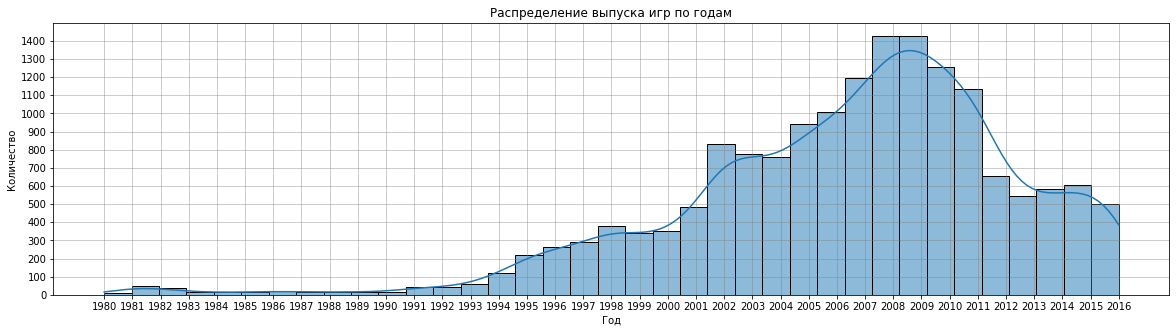

In [35]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df, x="year_of_release", kde=True, bins=37)
plt.title('Распределение выпуска игр по годам')
plt.ylabel('Количество')
plt.xlabel('Год')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.xticks(np.arange(1980, 2017, 1))
plt.yticks(np.arange(0, 1500, 100))
plt.show()

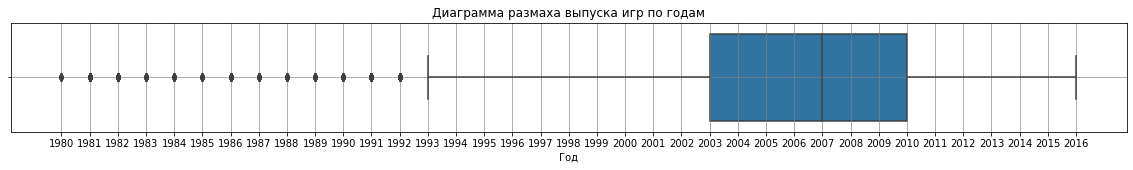

In [36]:
plt.rcParams['figure.figsize']=(20, 2)
sns.boxplot(x=df['year_of_release'])
plt.title('Диаграмма размаха выпуска игр по годам')
plt.xlabel('Год')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(1980, 2017, 1))
plt.show()

#### Вывод

Пик выпуска игр на исследуемых платформах приходится на 2007-2009 года.  
При этом видно два вспелска выпуска около 1992 года, а также 2002 года.  
С 2009 года наблюдается спад по выпуску игр.

### Продажи по платформам

- Оценить, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить характерный срок появления новых и исчезновения старых платформ. 

Создадим сводную таблицу с суммарными продажами игр по платформам:

In [37]:
df_platfrom_sales = df.pivot_table(values='total_sales', index='platform', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

Выведем на экран первые 5 строк таблицы:

In [38]:
df_platfrom_sales.head()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


Построим гистограмму количества продаж по платформам:

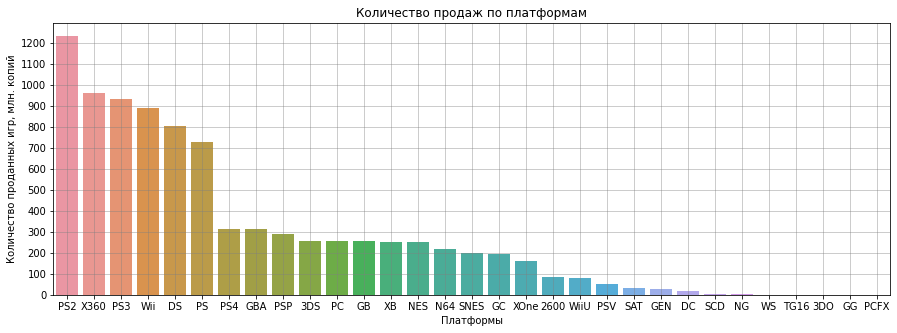

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_platfrom_sales, x=df_platfrom_sales['platform'], y="total_sales")
plt.title('Количество продаж по платформам')
plt.ylabel('Количество проданных игр, млн. копий')
plt.xlabel('Платформы')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 1300, 100))
plt.show()

Построим гистограмму количества наименований игр по платформам:

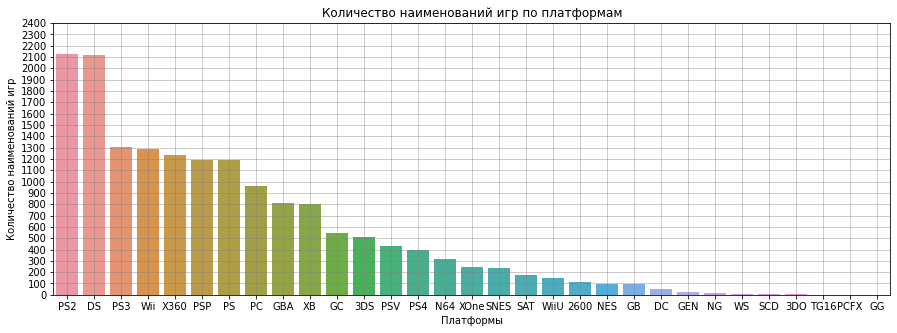

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(x='platform', data=df, order = df['platform'].value_counts().index)
plt.title('Количество наименований игр по платформам')
plt.ylabel('Количество наименований игр')
plt.xlabel('Платформы')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 2500, 100))
plt.show()

Выберем топ-11 платформ по продажам игр:

In [41]:
df_platfrom_year_top_11 = df[df['platform'].isin(list(df_platfrom_sales['platform'].head(11)))].reset_index(drop=True)

Сгруппируем по годам топ-11 платформ лидирующих в продажах:

In [42]:
df_platfrom_year_group_top_11 = df_platfrom_year_top_11.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

Построим распределение продаж игр взависимоти от платформы по годам:

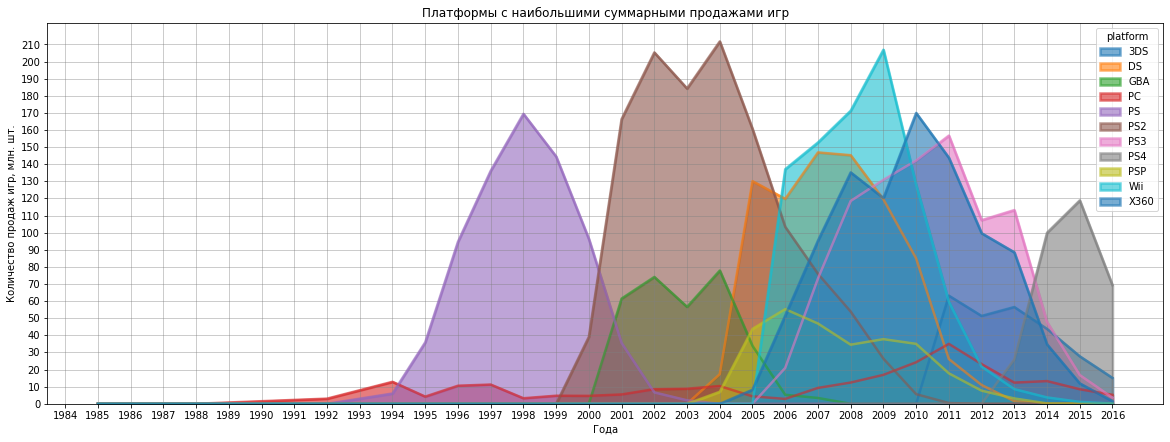

In [43]:
df_platfrom_year_group_top_11.plot.area(stacked=False, figsize=(20, 7), alpha=.6, linewidth=2.5)
plt.title('Платформы с наибольшими суммарными продажами игр')
plt.ylabel('Количество продаж игр, млн. шт.')
plt.xlabel('Года')
plt.grid(color='grey', axis='both', alpha=.5)
plt.yticks(np.arange(0, 220, 10))
plt.xticks(np.arange(1984, 2017, 1))
plt.show()

#### Вывод

Платформы с наибольшим числом продаж игр:

| Платформа | Продажи, млн. шт |
| ---- | ---- |
| PS2  | 1234 |
| X360 | 961  |
| PS3  | 931  |
| Wii  | 891  |
| DS   | 803  |

При этом срок жизни консолей около 6 лет, далее ей на смену приходит следующее поколение.  
По поводу платформы "ПК", срок жизни определить сложно, начиная с 1994 года по 2009 достаточно равномерное число продаж игр, в 2011 выден подъем, далее опустилось на тоже число копий (вероятно связано с моделями распростроения игр Free-to-play, пиратством на ПК, но это нужно проверять).

### Актуальный период

Поскольку средний срок жизни около платформы около 6 лет, представляется логично определить актуальный период с 2010 года.  

Актуальный период для прогноза на 2017 год = [2010; 2016]

Создадим датафрейм `df_actual`, в который поместим данные начиная с 2010 года:

In [44]:
 df_actual = (df_platfrom_year_top_11[df_platfrom_year_top_11['year_of_release'] >= 2010]).reset_index(drop=True)

Посмотрим на первые 5 строк:

In [45]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,69,7.0,Not data,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


Далее в работе будем проводить анализ на основе полученной таблице.

#### Вывод

Актуальный период определен с 2010 года по 2016 год.

### Потенциально прибыльные платформы

Определить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ. 

Сгруппируем данные по количеству продаж на платформах за актуальный период:

In [46]:
df_actual_group = df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

In [47]:
df_actual_group

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,
2010,NaN,85.02,24.28,5.64,142.17,NaN,35.04,127.95,170.03
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,59.65,143.84
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,21.71,99.74
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,8.59,88.58
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,3.75,34.74
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,1.14,11.96
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,0.18,1.52


Примечание - значение 'NaN' означает отсутствие продаж

Построим график:

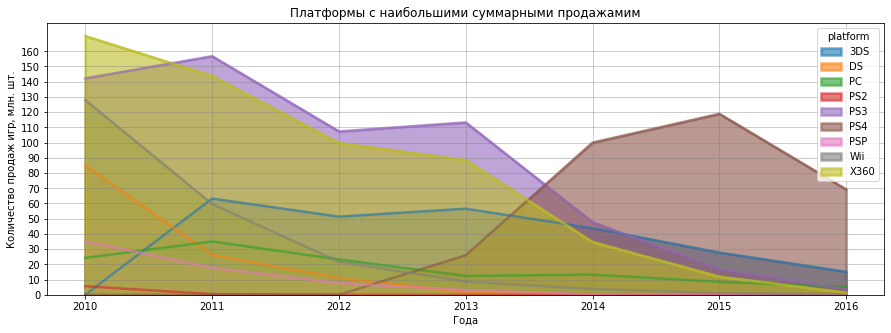

In [48]:
df_actual_group.plot.area(stacked=False, figsize=(15, 5), alpha=.6, linewidth=2.5)
plt.title('Платформы с наибольшими суммарными продажамим')
plt.ylabel('Количество продаж игр, млн. шт.')
plt.xlabel('Года')
plt.grid(color='grey', axis='both', alpha=.5)
plt.yticks(np.arange(0, 170, 10))
plt.xticks(np.arange(2010, 2017, 1))
plt.show()

#### Вывод

Начиная с 2010 года наблюдается падения продаж игр на основных платформах (Xbox360, Wii, PS3, 3DS).   
Можно предположить, падение связано со сроком жизни конселей, а также развитие мобильного рынка игр.  
В тожем время актуальная консоль PS4 находится на хорошем уровне по продажам, но на 2016 виден спад (возможно связано, что данные не полные по 2016).  
Платформа PC в стабильно, не резко снижается по продажу игр. 

На 2017 год, можно выделить потенциально прибыльные платформы (исходя из нашего датасета):  
- Playstation 4;
- Nintendo 3DS;
- PC;
- Xbox360;
- Playstation 3.

Примечание:  
В 2017 году планирует выход Nintendo Switch, которую нельзя не учитывать при планировнии продаж на 2017 год.

###  Глобальные продажи в разбивке по платформам

Построим диаграмму размаха продаж игр на платформа за актуальный период (количество продаж возьмем менее 1 млн. шт, с целью более удобного визуального представления):

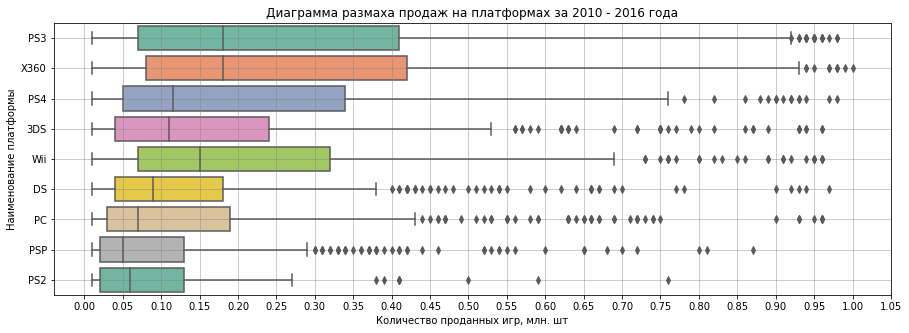

In [87]:
plt.rcParams['figure.figsize']=(15, 5)
sns.boxplot(x=df_actual['total_sales'][df_actual['total_sales'] < 1], 
            y=df_actual["platform"][df_actual['total_sales'] < 1], 
            orient="h", palette="Set2", order=["PS3", "X360",  "PS4", "3DS",  "Wii",  "DS",  "PC",  "PSP",  "PS2"])
plt.title('Диаграмма размаха продаж на платформах за 2010 - 2016 года')
plt.ylabel('Наименование платформы')
plt.xlabel('Количество проданных игр, млн. шт')
plt.grid(color='grey', axis='both', alpha=.5)
plt.xticks(np.arange(0, 1.1, .05))
plt.show()

#### Вывод

График "диаграмма с усами" в целом подтверждает наши выводы из предыдущего пунка исследования.  

На 2017 год, разумно выделить следующие платформы:  

- Playstation 4;  
- Nintendo 3DS;  
- PC;  
- Xbox360;  
- Playstation 3.  

###  Зависимость продаж от отзывов на PS4


Проведем оценку зависимости продаж от отзывов пользователей и критиков.  
Для этого поместим в датасет `df_actual_ps4` данные только по PlayStation4:

In [50]:
df_actual_ps4 = df_actual[df_actual['platform'] == 'PS4']

Посмотрим на первые 5 строк:

In [51]:
df_actual_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,69,7.0,Not data,14.63
13,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
27,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
31,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,69,7.0,Not data,7.98
32,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


Построим диаграмму рассеяния продаж по оценкам критиков на платформе PS4:

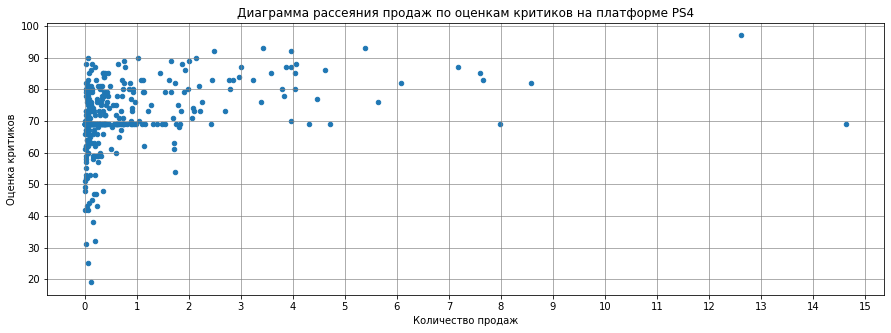

In [52]:
plt.rcParams['figure.figsize']=(15, 5)
df_actual_ps4.plot(x='total_sales', y='critic_score', kind='scatter')
plt.title('Диаграмма рассеяния продаж по оценкам критиков на платформе PS4')
plt.ylabel('Оценка критиков')
plt.xlabel('Количество продаж')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(0, 16, 1))
plt.show()

Выведем на экран коэффициент Пирсона, для продаж и оценки критиков:

In [53]:
df_actual_ps4['total_sales'].corr(df_actual_ps4['critic_score'])

0.34887240172175027

Построим диаграмму рассеяния продаж по оценкам пользователей на платформе PS4:

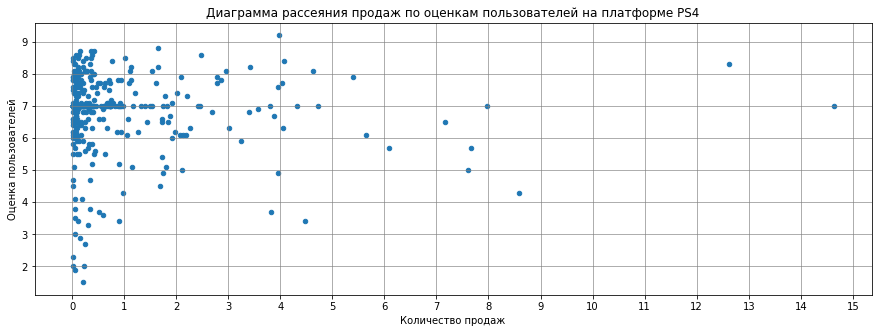

In [54]:
plt.rcParams['figure.figsize']=(15, 5)
df_actual_ps4.plot(x='total_sales', y='user_score', kind='scatter')
plt.title('Диаграмма рассеяния продаж по оценкам пользователей на платформе PS4')
plt.ylabel('Оценка пользователей')
plt.xlabel('Количество продаж')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(0, 16, 1))
plt.show()

Выведем на экран коэффициент Пирсона, для продаж и оценки пользователей:

In [55]:
df_actual_ps4['total_sales'].corr(df_actual_ps4['user_score'])

-0.039153543162937114

Выведем в виде матрицы диаграмм рассеяния:

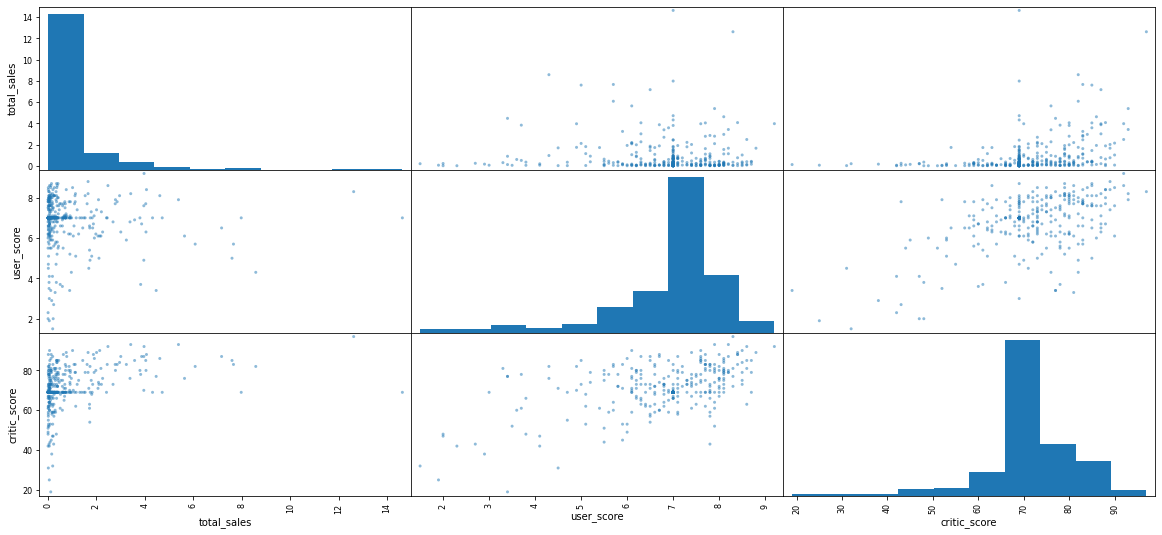

In [56]:
pd.plotting.scatter_matrix(df_actual_ps4[['total_sales', 'user_score', 'critic_score']], figsize=(20, 9))
plt.show()

Выведем на экран коэффициент Пирсона, для оценки критиков и оценки пользователей:

In [57]:
df_actual_ps4['critic_score'].corr(df_actual_ps4['user_score'])

0.5241364582818637

#### Вывод

Для корреляции продаж, оценок критиков и пользователей на PS4, наблюдается:  
Для оценки критиков и продаж наблюдается небольшая положительная корреляция, коэффициент Пирсона - `0,35`.  
Для оценки пользователй и продаж наблюдается очень слабая корреляция, коэффициент Пирсона - `-0,05`.  
При этом и коэффициент Пирсона для оценок пользователей и критиков: `0.51`.

### Зависимость продаж от отзывов на остальных платформах

Проведем оценку зависимости продаж от отзывов пользователей и критиков.  
Для этого поместим в датасет `df_actual_not_ps4` данные всех платформ, кроме PS4:

In [58]:
df_actual_not_ps4 = df_actual[df_actual['platform'] != 'PS4']

Посмотрим на первые 5 строк:

In [59]:
df_actual_not_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,69,7.0,Not data,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


Построим диаграмму рассеяния продаж по оценкам критиков на остальных платформах:

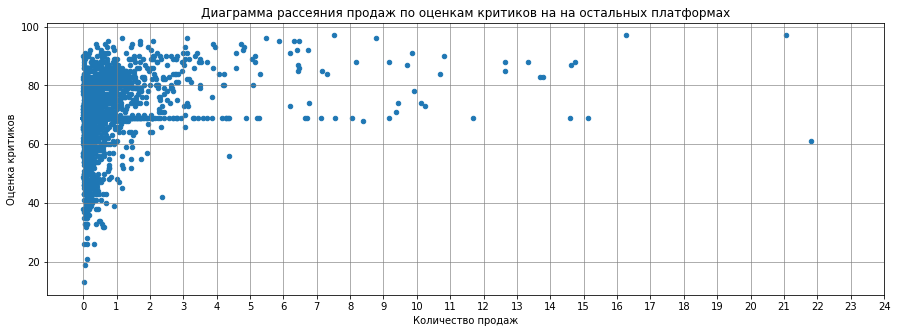

In [60]:
plt.rcParams['figure.figsize']=(15, 5)
df_actual_not_ps4.plot(x='total_sales', y='critic_score', kind='scatter')
plt.title('Диаграмма рассеяния продаж по оценкам критиков на на остальных платформах')
plt.ylabel('Оценка критиков')
plt.xlabel('Количество продаж')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(0, 25, 1))
plt.show()

Выведем на экран коэффициент Пирсона, для продаж и оценки критиков:

In [61]:
df_actual_not_ps4['total_sales'].corr(df_actual_not_ps4['critic_score'])

0.27673424685166

Построим диаграмму рассеяния продаж по оценкам пользователей:

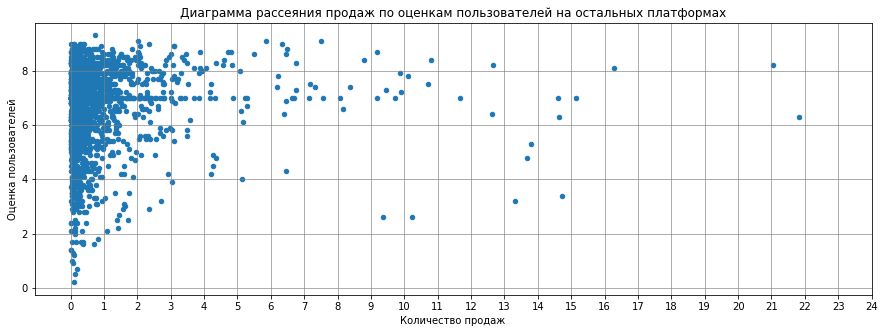

In [62]:
plt.rcParams['figure.figsize']=(15, 5)
df_actual_not_ps4.plot(x='total_sales', y='user_score', kind='scatter')
plt.title('Диаграмма рассеяния продаж по оценкам пользователей на остальных платформах')
plt.ylabel('Оценка пользователей')
plt.xlabel('Количество продаж')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(0, 25, 1))
plt.show()

Выведем на экран коэффициент Пирсона, для продаж и оценки пользователей:

In [63]:
df_actual_not_ps4['total_sales'].corr(df_actual_not_ps4['user_score'])

0.02343692093239044

Выведем в виде матрицы диаграмм рассеяния:

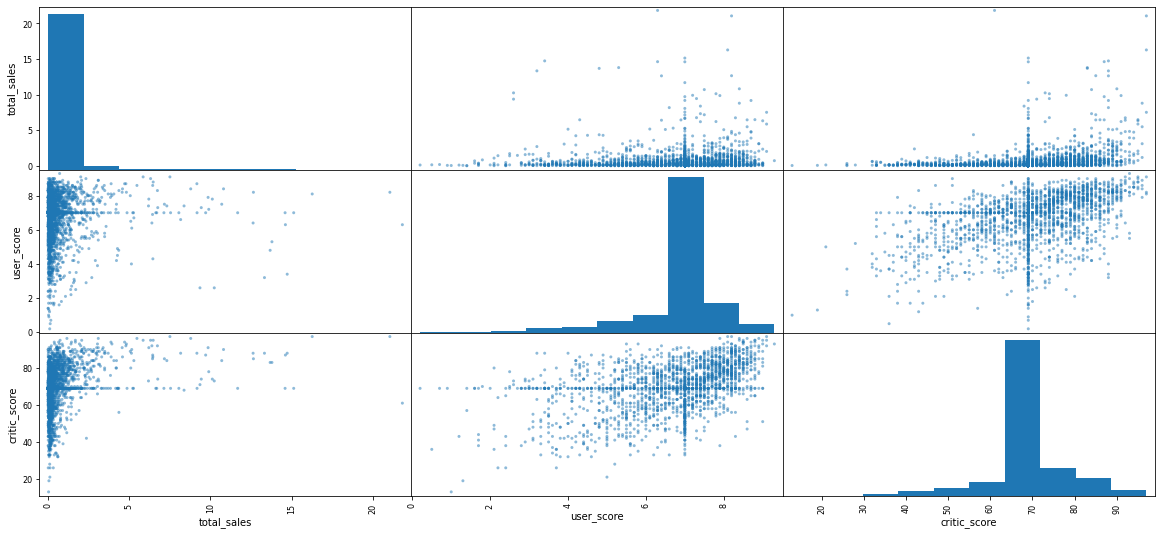

In [64]:
pd.plotting.scatter_matrix(df_actual_not_ps4[['total_sales', 'user_score', 'critic_score']], figsize=(20, 9))
plt.show()

Выведем на экран коэффициент Пирсона, для оценки критиков и оценки пользователей:

In [65]:
df_actual_not_ps4['critic_score'].corr(df_actual_not_ps4['user_score'])

0.43969546774107504

#### Вывод

Для корреляции продаж, оценок критиков и пользователей на остальных платформах, наблюдается:  
Для оценки критиков и продаж наблюдается небольшая положительная корреляция, коэффициент Пирсона - `0,28`.  
Для оценки пользователей и продаж наблюдается очень слабая корреляция, коэффициент Пирсона - `0,01`.  
При этом и коэффициент Пирсона для оценок пользователей и критиков: `0.42`.

### Жанры игр

Выведем на экран диаграмму распределения количества жанров по платформам за актуальный период:

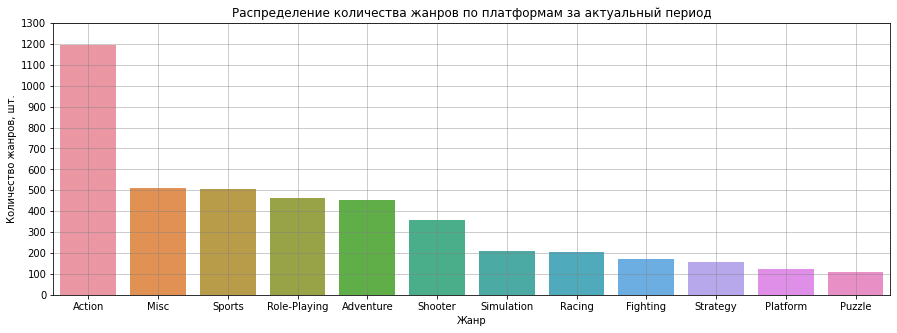

In [66]:
plt.figure(figsize=(15, 5))
sns.countplot(x='genre', data=df_actual, order = df_actual['genre'].value_counts().index)
plt.title('Распределение количества жанров по платформам за актуальный период')
plt.ylabel('Количество жанров, шт.')
plt.xlabel('Жанр')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 1350, 100))
plt.show()

Создадим сводную таблицу, в которую поместим количество продаж по жанрам:

In [67]:
df_genre_sales = df_actual.pivot_table(values='total_sales', index='genre', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

Посмотрим на таблицу:

In [68]:
df_genre_sales

,genre,total_sales
0,Action,599.69
1,Shooter,409.52
2,Sports,294.30
3,Role-Playing,289.69
4,Misc,210.24
5,Racing,102.51
6,Platform,94.70
7,Simulation,70.78
8,Fighting,70.25
9,Adventure,54.31


Выведем на экран диаграмму распределения количества продаж по жанрам:

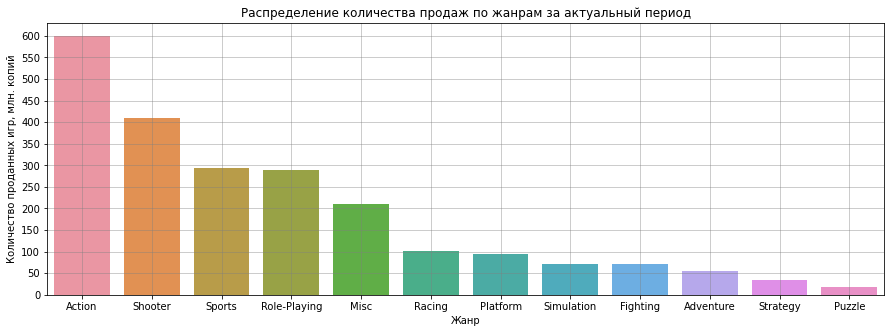

In [69]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_genre_sales, x=df_genre_sales['genre'], y="total_sales")
plt.title('Распределение количества продаж по жанрам за актуальный период')
plt.ylabel('Количество проданных игр, млн. копий')
plt.xlabel('Жанр')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 650, 50))
plt.show()

#### Вывод

При анализе жанров игр, можно сказать:   

Наибольшее количество игр выпущено по жанрам: `Action`, `Misc`, `Sports`, `Role-Playing`, `Adventure`.  
При этом, наибольшее количество продаж у жанров: `Action`, `Shooter`, `Sports`,  `Role-Playing`, `Misc`, на которые стоит равняться в первую очерeдь при планировании продаж на 2017 год.  


## Шаг 4. Портрет пользователя каждого региона

Напишем функцию, которая будет строить 4 диаграммы взависимости от аргументов.

In [70]:
def topn(suptitle, index, maxyrange, numbertop, kind):
  # определим размер нашей картинки, выведем все диаграммы на одну фигуру
  f, axs = plt.subplots(1, 4, figsize=(25, 5))

# название всей диаграммы
  plt.suptitle(suptitle)

# первая диаграмма
  axs[0].set_title("В Америке")
  axs[0].bar(df_actual.pivot_table(index=index, values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)['na_sales'].head(numbertop))
  axs[0].grid(color='grey', axis='both', alpha=0.5)
  axs[0].set_yticks(np.arange(0, maxyrange, 25))
  axs[0].set_ylabel('Количество проданных игр, млн. шт.')
  axs[0].set_xlabel(kind)
# вторая диаграмма
  axs[1].set_title("В Европе")
  axs[1].bar(df_actual.pivot_table(index=index, values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)['eu_sales'].head(numbertop))
  axs[1].grid(color='grey', axis='both', alpha=0.5)
  axs[1].set_yticks(np.arange(0, maxyrange, 25))
  axs[1].set_ylabel('Количество проданных игр, млн. шт.')
  axs[1].set_xlabel(kind)
# третья диаграмма
  axs[2].set_title("В Японии")
  axs[2].bar(df_actual.pivot_table(index=index, values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)['jp_sales'].head(numbertop))
  axs[2].grid(color='grey', axis='both', alpha=0.5)
  axs[2].set_yticks(np.arange(0, maxyrange, 25))
  axs[2].set_ylabel('Количество проданных игр, млн. шт.')
  axs[2].set_xlabel(kind)
# четвертая диаграмма
  axs[3].set_title("В остальных регионах")
  axs[3].bar(df_actual.pivot_table(index=index, values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)['other_sales'].head(numbertop))
  axs[3].grid(color='grey', axis='both', alpha=0.5)
  axs[3].set_yticks(np.arange(0, maxyrange, 25))
  axs[3].set_ylabel('Количество проданных игр, млн. шт.')
  axs[3].set_xlabel(kind)

  plt.show()

### Топ-5 популярных платформ

Выведем на экран топ-5 популярных платформ по регионам:

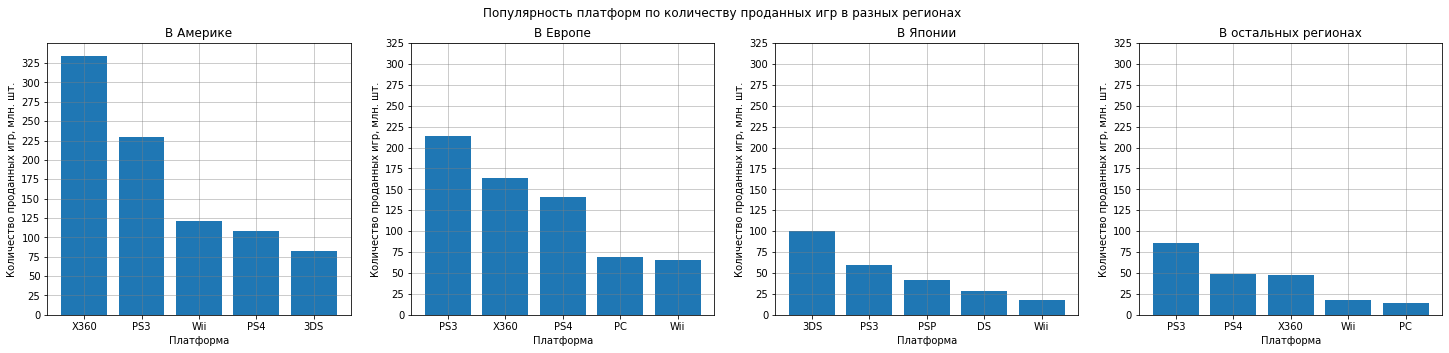

In [71]:
topn('Популярность платформ по количеству проданных игр в разных регионах', 'platform', 350, 5, 'Платформа')

### Топ-5 популярных жанров

Выведем на экран топ-5 жанров платформ по регионам:

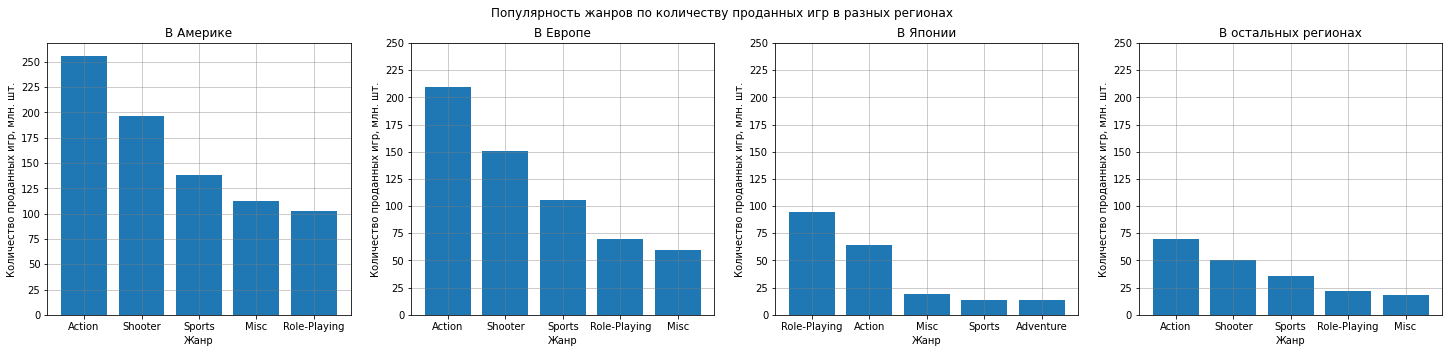

In [72]:
topn('Популярность жанров по количеству проданных игр в разных регионах', 'genre', 275, 5, 'Жанр')

### Рейтинг ESRB и продажи игр

Выведем на экран диаграммы продаж по рейтингам ESRB:

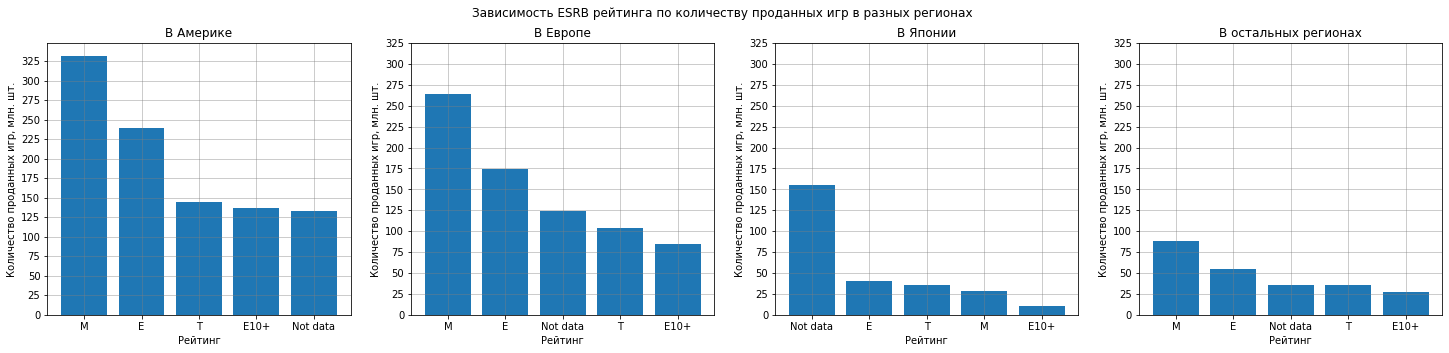

In [73]:
topn('Зависимость ESRB рейтинга по количеству проданных игр в разных регионах', 'rating', 350, 5, 'Рейтинг')

### Вывод

При составлении портрета пользователя, взависимости от региона выделяется следующиее:  

Самые популярные платформы:
- В Америке: `Xbox 360`, `PlayStation 3`.
- В Европе: `PlayStation 3`, `Xbox 360`.
- В Японии: `Nintedno 3DS`, `PlayStation 3`.
- В остальном мире: `PlayStation 3`, `PlayStation 4`.

Самые популярные жанры:
- В Америке: `Action`, `Shooter`.
- В Европе: `Action`, `Shooter`.
- В Японии: `Role-Playing`, `Action`.
- В остальном мире: `Action`, `Shooter`.

Наиболее продаваемые игры, взависимости от рейтинга ESRB:
- В Америке: `M`, `E`.
- В Европе: `M`, `E`.
- В Японии: `E`, `T`.
- В остальном мире: `M`, `E`.


*Примичание:*  
E (Everyone) — Для всех. T (Teen) — Подросткам. M (Mature) — От 17 лет.  

## Шаг 5. Проверка гипотез

### Гипотеза: Средние пользовательские рейтинги на платформах Xbox One и PC одинаковые

Посмотрим на распределение выборок по платформам Xbox One и PC:  

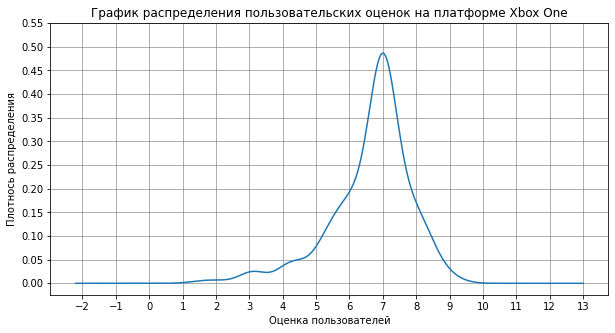

In [74]:
plt.rcParams['figure.figsize']=(10, 5)
df['user_score'][df['platform'] == 'XOne'].plot(kind='kde')
plt.title('График распределения пользовательских оценок на платформе Xbox One')
plt.ylabel('Плотнось распределения')
plt.xlabel('Оценка пользователей')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(-2, 14, 1))
plt.yticks(np.arange(0, 0.6, 0.05))
plt.show()

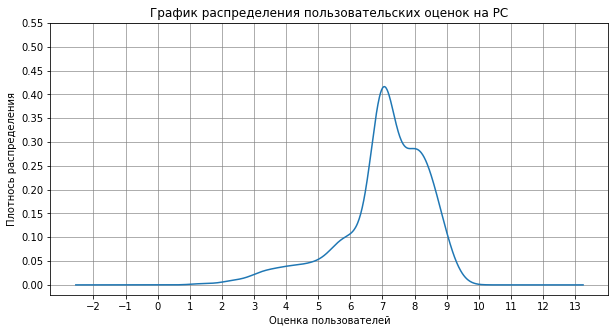

In [75]:
plt.rcParams['figure.figsize']=(10, 5)
df['user_score'][df['platform'] == 'PC'].plot(kind='kde')
plt.title('График распределения пользовательских оценок на PC')
plt.ylabel('Плотнось распределения')
plt.xlabel('Оценка пользователей')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(-2, 14, 1))
plt.yticks(np.arange(0, 0.6, 0.05))
plt.show()

В целом обе выборки распределены нормально, есть небольшая площадка в районе 7.5 и 8 у оценок на ПК, но не критично.

Выбираем двустроннею гипотезу, так как значения меньше и больше также важны.  
За нулевую гипотезу H0 принимаем: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
За альтернативную H1 принимаем: средние пользовательские рейтинги платформ Xbox One и PC разлючаются;  
Уровень статической значимости берем: 5%.  

Проведем расчет:

In [76]:
alpha = .05

results = st.ttest_ind(
    df['user_score'][df['platform'] == 'XOne'], 
    df['user_score'][df['platform'] == 'PC'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.191167897821935e-05
Отвергаем нулевую гипотезу


Проверим, расчитав средние выручки по тарифам:

In [77]:
df['user_score'][df['platform'] == 'XOne'].mean()

6.647368421052628

In [78]:
df['user_score'][df['platform'] == 'PC'].mean()

7.052037617554871

#### Вывод

Средние пользовательские рейтинги на платформах Xbox One и PC отличаются (`6,64` и `7,05` соответственно)

### Средние пользовательские рейтинги жанров Action и Sports разные

Посмотрим на распределение выборок по жанрам Action и Sports:

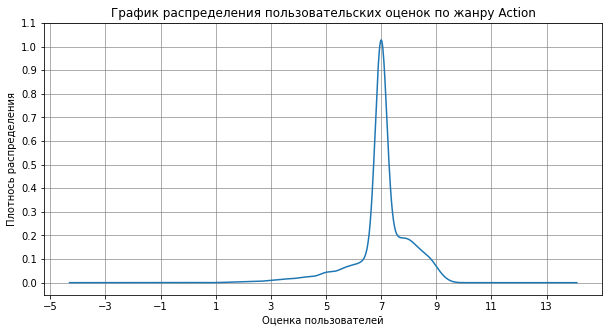

In [79]:
plt.rcParams['figure.figsize']=(10, 5)
df['user_score'][df['genre'] == 'Action'].plot(kind='kde')
plt.title('График распределения пользовательских оценок по жанру Action')
plt.ylabel('Плотнось распределения')
plt.xlabel('Оценка пользователей')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(-5, 15, 2))
plt.yticks(np.arange(0, 1.2, 0.1))
plt.show()

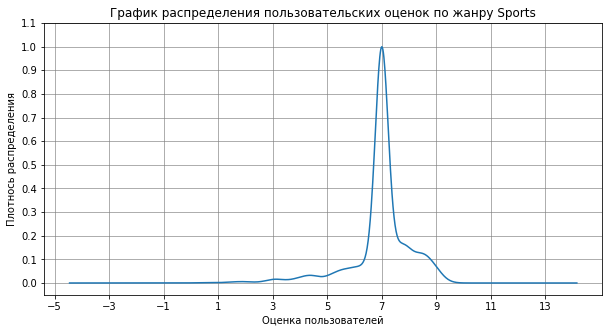

In [80]:
plt.rcParams['figure.figsize']=(10, 5)
df['user_score'][df['genre'] == 'Sports'].plot(kind='kde')
plt.title('График распределения пользовательских оценок по жанру Sports')
plt.ylabel('Плотнось распределения')
plt.xlabel('Оценка пользователей')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(-5, 15, 2))
plt.yticks(np.arange(0, 1.2, 0.1))
plt.show()

В целом обе выборки распределены нормально. "Вытенутость вверх" говорит о небольшом значении стандартного отклонения.

Выбираем двустроннею гипотезу, так как значения меньше и больше также важны.  
За нулевую гипотезу H0 принимаем: cредние пользовательские рейтинги жанров Action и Sports одинаковые;  
За альтернативную H1 принимаем: cредние пользовательские рейтинги жанров Action и Sports разные;  
Уровень статической значимости берем: 5%.  

Проведем расчет:

In [81]:
alpha = .05

results = st.ttest_ind(
    df['user_score'][df['genre'] == 'Action'], 
    df['user_score'][df['genre'] == 'Sports'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.06234631937667166
Не получилось отвергнуть нулевую гипотезу


Проверим, расчитав средние выручки по тарифам:

In [82]:
df['user_score'][df['genre'] == 'Action'].mean()

7.031569398246123

In [83]:
df['user_score'][df['genre'] == 'Sports'].mean()

6.977233304423235

#### Вывод

Средние пользовательские рейтинги жанров Action и Sports схожи (`7,03` и `6,98` соответственно)

## Шаг 6. Вывод

1. При изучении данных и предобработке данных выполнено: 
  - Добавили колонку 'total_sales' с общим числом продаж.  
  - Определили отсутствие дубликатов.
  - Заполнили пропущенные значения.



2. Исследование данных  

  - Пик выпуска игр на исслудемых платформах приходится на 2007-2009 года.  
  -  Платформы с наибольшим числом продаж игр: PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii, Nintendo DS.   
  - Срок жизни консолей около 6 лет.  
  - На 2017 год, можно выделить потенциально прибыльные платформы (исходя из нашего датасета): Playstation 4; Nintendo 3DS; PC; Xbox360; Playstation 3.
  - Корреляции продаж, оценок критиков и пользователей выраженны слабо.
  - Наибольшее количество продаж у жанров: `Action`, `Shooter`, `Sports`,  `Role-Playing`, `Misc`, на которые стоит равняться в первую очерeдь при планировании продаж на 2017 год.  

3. Портрет пользователя взависимости от региона

  Самые популярные платформы:
  - В Америке: `Xbox 360`, `PlayStation 3`.
  - В Европе: `PlayStation 3`, `Xbox 360`.
  - В Японии: `Nintedno 3DS`, `PlayStation 3`.
  - В остальном мире: `PlayStation 3`, `PlayStation 4`.  

  Самые популярные жанры:
  - В Америке: `Action`, `Shooter`.
  - В Европе: `Action`, `Shooter`.
  - В Японии: `Role-Playing`, `Action`.
  - В остальном мире: `Action`, `Shooter`.  

  Наиболее продаваемые игры, взависимости от рейтинга ESRB:
  - В Америке: `M`, `E`.
  - В Европе: `M`, `E`.
  - В Японии: `E`, `T`.
  - В остальном мире: `M`, `E`.


4. Проверка гипотез
  - Средние пользовательские рейтинги на платформах Xbox One и PC отличаются (`6,64` и `7,05` соответственно)

  - Средние пользовательские рейтинги жанров Action и Sports схожи (`7,03` и `6,98` соответственно)


**Ответ на вопрос исследования**   

При планировании бюджета на 2017 год, предпочтение стоит отдать: 
- Платформам: `PlayStation 4`, `PlayStation 3`, `Xbox 360`, `Nintedno 3DS`, `PC`;
- Жанрам: `Action`, `Shooter`, `Role-Playing`.